# base_dictionary.py

In [242]:
from dictionary.word_frequency import WordFrequency


# -------------------------------------------------
# Base class for dictionary implementations. DON'T CHANGE THIS FILE.
#
# __author__ = 'Son Hoang Dau'
# __copyright__ = 'Copyright 2022, RMIT University'
# -------------------------------------------------

class BaseDictionary:
    def build_dictionary(self, words_frequencies: [WordFrequency]):
        """
        construct the data structure to store nodes
        @param words_frequencies: list of (word, frequency) to be stored
        """
        pass

    def search(self, word: str) -> int:
        """
        search for a word
        @param word: the word to be searched
        @return: frequency > 0 if found and 0 if NOT found
        """
        pass

    def add_word_frequency(self, word_frequency: WordFrequency) -> bool:
        """
        add a word and its frequency to the dictionary
        @param word_frequency: (word, frequency) to be added
        @return: True whether succeeded, False when word is already in the dictionary
        """
        pass

    def delete_word(self, word: str) -> bool:
        """
        delete a word from the dictionary
        @param word: word to be deleted
        @return: whether succeeded, e.g. return False when point not found
        """
        pass

    def autocomplete(self, prefix_word: str) -> [WordFrequency]:
        """
        return a list of 3 most-frequent words in the dictionary that have 'prefix_word' as a prefix
        @param prefix_word: word to be autocompleted
        @return: a list (could be empty) of (at most) 3 most-frequent words with prefix 'prefix_word'
        """
        pass




# list_dictionary.py

In [243]:
from dictionary.word_frequency import WordFrequency
from dictionary.base_dictionary import BaseDictionary
import time
import math

# ------------------------------------------------------------------------
# This class is required TO BE IMPLEMENTED. List-based dictionary implementation.
#
# __author__ = 'Son Hoang Dau'
# __copyright__ = 'Copyright 2022, RMIT University'
# ------------------------------------------------------------------------

class ListDictionary(BaseDictionary):
    def __init__(self):
        self.data = [];

    def partition(self, data, i, k, by):
        midpoint = i + (k - i) // 2
        pivot = getattr(data[midpoint], by)

        done = False
        l = i
        h = k
        while not done:
            while getattr(data[l], by) < pivot:
                l = l + 1
            while pivot < getattr(data[h], by):
                h = h - 1
            if l >= h:
                done = True
            else:
                temp = data[l]
                data[l] = data[h]
                data[h] = temp
                l = l + 1
                h = h - 1
        return h

    def quicksort(self, data, i, k, by: str):
        j = 0
        if i >= k:
            return
        j = self.partition(data, i, k, by)
        self.quicksort(data, i, j, by)
        self.quicksort(data, j + 1, k, by)
        return

    # merge sort algorithm sourced from Zybooks
    def merge(self, data, i, j, k, by: str):
        merged_size = k - i + 1  # Size of merged partition
        merged_data = [0] * merged_size  # Dynamically allocates temporary array
        # for merged numbers
        merge_pos = 0  # Position to insert merged number
        left_pos = i  # Initialize left partition position
        right_pos = j + 1  # Initialize right partition position

        # Add smallest element from left or right partition to merged numbers
        while left_pos <= j and right_pos <= k:
            if getattr(data[left_pos], by) <= getattr(data[right_pos], by):
                merged_data[merge_pos] = data[left_pos]
                left_pos += 1
            else:
                merged_data[merge_pos] = data[right_pos]
                right_pos += 1
            merge_pos = merge_pos + 1

        # If left partition is not empty, add remaining elements to merged numbers
        while left_pos <= j:
            merged_data[merge_pos] = data[left_pos]
            left_pos += 1
            merge_pos += 1

        # If right partition is not empty, add remaining elements to merged numbers
        while right_pos <= k:
            merged_data[merge_pos] = data[right_pos]
            right_pos = right_pos + 1
            merge_pos = merge_pos + 1

        # Copy merge number back to numbers
        for merge_pos in range(merged_size):
            data[i + merge_pos] = merged_data[merge_pos]

    def merge_sort(self, data, i, k, by: str):
        j = 0

        if i < k:
            j = (i + k) // 2  # Find the midpoint in the partition

            # Recursively sort left and right partitions
            self.merge_sort(data, i, j, by)
            self.merge_sort(data, j + 1, k, by)

            # Merge left and right partition in sorted order
            self.merge(data, i, j, k, by)

    def __str__(self):
        str = ""
        for items in self.data:
            str += f"({items.word}, {items.frequency})\n"
        return str

    def build_dictionary(self, words_frequencies: [WordFrequency]):
        """
        construct the data structure to store nodes
        @param words_frequencies: list of (word, frequency) to be stored
        """
        self.data = words_frequencies
        # self.quicksort(self.data, 0, len(self.data) - 1, "word")
        self.data.sort(key=lambda x: x.word)

    def binSearch(self, word:str) -> (bool, int):
        """
        binary search for a word
        @param word: the word to be searched
        @return: (True, the index of word_frequencies) OR (False, the index of word_frequencies to be inserted into)
        """
        low, mid, high = 0, 0, len(self.data) - 1

        while low <= high:
            mid = (low + high) // 2
            if self.data[mid].word > word:
                high = mid - 1
            elif self.data[mid].word < word:
                low = mid + 1
            else:
                return (True, mid)
        if word >= self.data[mid].word:
            return (False, mid + 1)
        else:
            return (False, mid)

    def binSearchAC(self, prefix_word:str) -> int:
        """
        binary search for a prefix
        @param prefix: the prefix to be searched
        @return: if found: the index of the first encountered word with the same prefix; if not: -1
        """
        # The implementation is almost identical to binSearch except that prefix is compared to word upto its own length
        low, mid, high = 0, 0, len(self.data) - 1

        while low <= high:
            mid = (low + high) // 2
            if self.data[mid].word[:len(prefix_word)] > prefix_word:
                high = mid - 1
            elif self.data[mid].word[:len(prefix_word)] < prefix_word:
                low = mid + 1
            else:
                return mid
        return -1

    def getAutocompleteList(self, prefix_word: str, idx: int) -> [WordFrequency]:
        """
        add all the words sharing the same prefix_word to a list and return it unsorted
        @param prefix_word: the prefix_word to be searched, idx: the starting index to search from in both directions (left and right)
        @return: an unsorted list containing all the words sharing the same prefix_word
        """
        res = []
        # Add the first word
        res.append(self.data[idx])
        left_idx = idx - 1
        right_idx = idx + 1

        if left_idx >= 0:
            curr_left_word = self.data[left_idx].word[:len(prefix_word)]
        # Add words to the left of the first word
        while left_idx > 0 and curr_left_word == prefix_word:
            res.append(self.data[left_idx])
            left_idx -= 1
            curr_left_word = self.data[left_idx].word[:len(prefix_word)]

        if right_idx <= len(self.data) - 1:
            curr_right_word = self.data[right_idx].word[:len(prefix_word)]
        # Add words to the right of the first word
        while right_idx < len(self.data) - 1 and curr_right_word == prefix_word:
            res.append(self.data[right_idx])
            right_idx += 1
            curr_right_word = self.data[right_idx].word[:len(prefix_word)]

        return res

    def search(self, word: str) -> int:
        """
        search for a word
        @param word: the word to be searched
        @return: frequency > 0 if found and 0 if NOT found
        """
        # Employ binary search
        isFound, foundIdx = self.binSearch(word)
        if not isFound:
            return 0
        else:
            return self.data[foundIdx].frequency

    def add_word_frequency(self, word_frequency: WordFrequency) -> bool:
        """
        add a word and its frequency to the dictionary
        @param word_frequency: (word, frequency) to be added
        :return: True whether succeeded, False when word is already in the dictionary
        """
        # Employ binary search
        if len(self.data) == 0:
            self.data.append(word_frequency)
        else:
            word = word_frequency.word
            isFound, foundIdx = self.binSearch(word)
            actualLength = len(self.data)
            if isFound:
                return False
            # If not found, add the word in self.data
            else:
                # Create space to shuffle elements to the right by 1
                self.data.append(None)
                for i in range(actualLength - 1, foundIdx - 1, -1):
                    self.data[i + 1] = self.data[i]
                self.data[foundIdx] = word_frequency
                return True

    def delete_word(self, word: str) -> bool:
        """
        delete a word from the dictionary
        @param word: word to be deleted
        @return: whether succeeded, e.g. return False when point not found
        """
        isFound, foundIdx = self.binSearch(word)
        if isFound:
            for i in range(foundIdx, len(self.data) - 1):
                self.data[i] = self.data[i + 1]
            # In all cases, the last element will be deleted if the word is found
            del self.data[-1]
            return True
        # If found, delete the word in self.data
        else:
            return False



    def autocomplete(self, prefix_word: str) -> [WordFrequency]:
        """
        return a list of 3 most-frequent words in the dictionary that have 'prefix_word' as a prefix
        @param prefix_word: word to be autocompleted
        @return: a list (could be empty) of (at most) 3 most-frequent words with prefix 'prefix_word'
        """
        # As soon as prefix_word matches with any word, scan all the words to its left and right and put them in a new list
        # Iterate them only once to find the 3 most-frequent words
        idx = self.binSearchAC(prefix_word)
        if idx == -1:
            return []
        else:
            lst = self.getAutocompleteList(prefix_word, idx)
            lst.sort(key=lambda x: x.frequency, reverse=True)
            return lst[:3]



# hashtable_dictionary.py

In [244]:
from dictionary.base_dictionary import BaseDictionary
from dictionary.word_frequency import WordFrequency

# ------------------------------------------------------------------------
# This class is required TO BE IMPLEMENTED. Hash-table-based dictionary.
#
# __author__ = 'Son Hoang Dau'
# __copyright__ = 'Copyright 2022, RMIT University'
# ------------------------------------------------------------------------

class HashTableDictionary(BaseDictionary):
    def __init__(self):
        self.data = {}

    def build_dictionary(self, words_frequencies: [WordFrequency]):
        """
        construct the data structure to store nodes
        @param words_frequencies: list of (word, frequency) to be stored
        """
        self.data = {entry.word: entry.frequency for entry in words_frequencies}

    def search(self, word: str) -> int:
        """
        search for a word
        @param word: the word to be searched
        @return: frequency > 0 if found and 0 if NOT found
        """
        return self.data.get(word, 0)

    def add_word_frequency(self, word_frequency: WordFrequency) -> bool:
        """
        add a word and its frequency to the dictionary
        @param word_frequency: (word, frequency) to be added
        :return: True whether succeeded, False when word is already in the dictionary
        """
        freq = self.search(word_frequency.word)
        if freq > 0:
            return False
        else:
            self.data[word_frequency.word] = word_frequency.frequency
            return True

    def delete_word(self, word: str) -> bool:
        """
        delete a word from the dictionary
        @param word: word to be deleted
        @return: whether succeeded, e.g. return False when point not found
        """
        freq = self.search(word)
        if freq > 0:
            del self.data[word]
            return True
        else:
            return False


    def autocomplete(self, word: str) -> [WordFrequency]:
        """
        return a list of 3 most-frequent words in the dictionary that have 'word' as a prefix
        @param word: word to be autocompleted
        @return: a list (could be empty) of (at most) 3 most-frequent words with prefix 'word'
        """
        # Find the keys that start with a given prefix
        autoDic = {key: freq for key, freq in self.data.items() if key.startswith(word)}
        # Use Python's built-in sorting algorithm to sort autoDic by frequency and return the last three elements in descending order.
        return [WordFrequency(key, freq) for key, freq in sorted(autoDic.items(), key=lambda item: item[1])][-3:][::-1]


# tearnarysearchtree_dictionary.py

In [245]:
from dictionary.base_dictionary import BaseDictionary
from dictionary.word_frequency import WordFrequency
from dictionary.node import Node


# ------------------------------------------------------------------------
# This class is required to be implemented. Ternary Search Tree implementation.
#
# __author__ = 'Son Hoang Dau'
# __copyright__ = 'Copyright 2022, RMIT University'
# ------------------------------------------------------------------------


class TernarySearchTreeDictionary(BaseDictionary):
    def __init__(self):
        self.root = Node()

    def build_dictionary(self, words_frequencies: [WordFrequency]):
        """
        construct the data structure to store nodes
        @param words_frequencies: list of (word, frequency) to be stored
        """
        for idx, entry in enumerate(words_frequencies):
            self.add_word_frequency(entry)

    def search(self, word: str) -> int:
        """
        search for a word
        @param word: the word to be searched
        @return: frequency > 0 if found and 0 if NOT found
        """
        endNode = self.search_from_node(self.root, word, 0)
        if endNode == None:
            return 0
        elif endNode.end_word == False:
            return 0
        else:
            return endNode.frequency



    def search_from_node(self, currNode, word, currIdx):
        """
        search for a word recursively
        @param node, word, currIdx: node to start from, the word to be searched, currIdx to search curLetter at
        @return: frequency > 0 if found and 0 if NOT found
        """
        currLetter = word[currIdx]
        if currNode == None or currNode.letter == None:
            return None
        if currNode.letter < currLetter:
            return self.search_from_node(currNode.right, word, currIdx)
        elif currNode.letter > currLetter:
            return self.search_from_node(currNode.left, word, currIdx)
        elif currIdx < len(word) - 1:
            return self.search_from_node(currNode.middle, word, currIdx + 1)
        else:
            return currNode


    def add_word_frequency(self, word_frequency: WordFrequency) -> bool:
        """
        add a word and its frequency to the dictionary
        @param word_frequency: (word, frequency) to be added
        :return: True whether succeeded, False when word is already in the dictionary
        """
        return self.add_word_from_root(self.root, word_frequency.word, word_frequency.frequency, 0)

    def add_word_from_root(self, currNode, word, freq, currIdx) -> bool:
        """
        add a word recursively
        @param currNode, word, freq, currIdx: currNode initially self.root; currIdx is used for the base case.
        :return: True if addition is successful, false if the word being added already exists.
        """
        currLetter = word[currIdx]
        # Base case on the last word
        if currIdx == len(word) - 1:
            if currNode.letter == None:
                currNode.letter = currLetter
                currNode.frequency = freq
                currNode.end_word = True
                return True
            # If currNode is the same as curLetter
            else:
                if currNode.letter > currLetter:
                    if currNode.left == None:
                        currNode.left = Node()
                    currNode = currNode.left
                    return self.add_word_from_root(currNode, word, freq, currIdx)
                elif currNode.letter < currLetter:
                    if currNode.right == None:
                        currNode.right = Node()
                    currNode = currNode.right
                    return self.add_word_from_root(currNode, word, freq, currIdx)
                else:
                    if currNode.end_word == True:
                        return False
                    else:
                        currNode.frequency = freq
                        currNode.end_word = True
                        return True
        # Recursive case
        else:
            # When no word is present
            if currNode.letter == None:
                currNode.letter = currLetter
                currNode.middle = Node()
                currNode = currNode.middle
                return self.add_word_from_root(currNode, word, freq, currIdx + 1)
            elif currNode.letter < currLetter:
                if currNode.right == None:
                    currNode.right = Node()
                currNode = currNode.right
                return self.add_word_from_root(currNode, word, freq, currIdx)
            elif currNode.letter > currLetter:
                if currNode.left == None:
                    currNode.left = Node()
                currNode = currNode.left
                return self.add_word_from_root(currNode, word, freq, currIdx)
            else:
                if currNode.middle == None:
                    currNode.middle = Node()
                currNode = currNode.middle
                return self.add_word_from_root(currNode, word, freq, currIdx + 1)

    def delete_word(self, word: str) -> bool:
        """
        delete a word from the dictionary
        @param word: word to be deleted
        @return: whether succeeded, e.g. return False when point not found
        """
        # First, search for a word
        # endNode = self.search_from_node(self.root, word, 0)
        # if not endNode or endNode.end_word == False:
        #     return False
        # else:
        #     endNode.frequency = None
        #     endNode.end_word = False
        #     if endNode.left == None and endNode.middle == None and endNode.right == None:
        #         del endNode
        # return True
        deleteStatus = [False]
        self.delete_from_node(self.root, word, 0, deleteStatus)
        return deleteStatus[0]

    def delete_from_node(self, currNode, word, currIdx, deleteStatus):
        """
        delete a word recursively
        @param prevNode, currNode, word, currIdx
        @return: False if not found or end_word equals False, True if found and end_word equals True
        """
        currLetter = word[currIdx]
        if currNode == None or currNode.letter == None:
            return False
        if currNode.letter < currLetter:
            if self.delete_from_node(currNode.right, word, currIdx, deleteStatus):
                currNode.right = None
            else:
                return False
        elif currNode.letter > currLetter:
            if self.delete_from_node(currNode.left, word, currIdx, deleteStatus):
                currNode.left = None
            else:
                return False
        elif currIdx < len(word) - 1:
            if self.delete_from_node(currNode.middle, word, currIdx + 1, deleteStatus):
                currNode.middle = None
            else:
                return False
        else:
            if currNode.end_word:
                deleteStatus[0] = True
                currNode.frequency = None
                currNode.end_word = False

        if currNode.end_word == False:
            if currNode.left == None and currNode.middle == None and currNode.right == None:
                return True
            else:
                return False
        else:
            return False

    def add_ac_words(self, currNode: Node, compoundWord: str, ac_lst: list) -> [WordFrequency]:
        """
        Recursively traverse all the children nodes of currNode and create an instance of WordFrequency
        using compoundWord and the frequency of currNode if its end_word is True.
        @param currNode, compoundWord, ac_lst: compoundWord to keep track of the word to be added
        ac_lst: the list to which an instance of WordFrequency is added
        @return: a list (could be empty) of all the words with prefix 'word'
        """

        # Base Case 1: currNode is None
        if currNode == None:
            return
        # Recursive case:
        else:
            if currNode.end_word == True:
                ac_lst.append(WordFrequency(compoundWord + currNode.letter, currNode.frequency))
            self.add_ac_words(currNode.left, compoundWord, ac_lst)
            self.add_ac_words(currNode.middle, compoundWord + currNode.letter, ac_lst)
            self.add_ac_words(currNode.right, compoundWord, ac_lst)

    def autocomplete(self, word: str) -> [WordFrequency]:
        """
        return a list of 3 most-frequent words in the dictionary that have 'word' as a prefix
        @param word: word to be autocompleted
        @return: a list (could be empty) of (at most) 3 most-frequent words with prefix 'word'
        """
        # a list of words to be autocompleted
        ac_lst = []

        # Find the prefix
        currNode = self.search_from_node(self.root, word, 0)

        # If the prefix does not exist
        if not currNode:
            return ac_lst
        else:
            # If the currNode's end_word is true
            if currNode.end_word == True:
                ac_lst.append(WordFrequency(word, currNode.frequency))
            self.add_ac_words(currNode.middle, word, ac_lst)

            # Python's built-in Timsort
            ac_lst.sort(key=lambda wordFrequency: wordFrequency.frequency, reverse=True)

        return ac_lst[:3]


# word_frequency.py

In [246]:

# -------------------------------------------------
# __author__ = 'Son Hoang Dau'
# __copyright__ = 'Copyright 2022, RMIT University'
# -------------------------------------------------

# Class representing a word and its frequency
class WordFrequency:
    def __init__(self, word: str, frequency: int):
        self.word = word
        self.frequency = frequency


# node.py

In [247]:

# -------------------------------------------------
# __author__ = 'Son Hoang Dau'
# __copyright__ = 'Copyright 2022, RMIT University'
# -------------------------------------------------

# DON'T CHANGE THIS FILE
# Class representing a node in the Ternary Search Tree
class Node:

    def __init__(self, letter=None, frequency=None, end_word=False):
        self.letter = letter            # letter stored at this node
        self.frequency = frequency      # frequency of the word if this letter is the end of a word
        self.end_word = end_word        # True if this letter is the end of a word
        self.left = None    # pointing to the left child Node, which holds a letter < self.letter
        self.middle = None  # pointing to the middle child Node
        self.right = None   # pointing to the right child Node, which holds a letter > self.letter


## General plan for the Empirical Analysis of Algorithm Time Efficiency

1. Understand the experiment's purpose
    - to find which data structure is most appropriate for given scenarios.
2. Decide on the efficiency metric M to be measured and the measurement unit
    - We're required to measure a time unit in seconds
3. Decide on characteristics of the input sample
    - (500, 1000, 2000, 4000, 8000, 16,000, 32,000, 64,000, 128,000)
4. Prepare a program implementing the algorithm (or algorithms) for the experimentation.                         
5. Generate a sample of inputs.
6. Run the algorithm (or algorithms) on the sample's inputs and record the data observed.
7. Anaylse the data obtained.


### Generate a sample of inputs

In [248]:
import random
import copy

input_sizes = [250, 500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
size_range_start = 0
size_range_end = input_sizes[-1]
num_datasets = 3

# with open("sampleData200k.txt", 'r') as f:
#     lines = f.readlines()
#     for i in range(num_datasets):
#         dataset = lines[size_range_start:size_range_end] # 0:64,000, 64,000:128,000, 128,000:192,000
#         dataset2 = copy.deepcopy(dataset)
#         random.shuffle(dataset2)
#         size_range_start = size_range_end
#         size_range_end += input_sizes[-1]
#         # Generate the datasets for Scenario 1
#         with open("generatedData/dataset" + str(i) +'.txt', 'w' ) as f:
#             f.writelines(dataset)
#         with open("generatedData/shuffled_dataset" + str(i) +'.txt', 'w' ) as f:
#             f.writelines(dataset2)

#### Parameter Setting
##### The Sizes of the Datasets & the Number of the Datasets  & the Number of Operations Tested
Since the empirical analysis outdoes the mathematical analysis in investigating the average-case efficiency, it makes more sense to generate multiple datasets and obtain the average time of operations for each of the implementations across the datasets. Testing with multiple datasets also helps lower the chances of measuring the running time of the worst-case scenario and producing biased results. For this reason, we have chosen to conduct our analysis using 3 datasets, each of which contains 64,000 words, as we can make the most out of the provided dataset "sampleData200k.txt" (utilizing almost all of the words). 

### Methods for Measuring the Running Times
FIX IN-TEXT CITATION
For Scenario 1 and 2, We have decided on the range of input sizes from 250 to 64,000 at a two-fold increase/decrease since 250 is not too trivially small and the impact of increasing or decreasing input sizes according to a pattern makes it easy to analyze the time complexity. For both scenarios, an accumulation of time will be recorded as the input size grows or shrinks. For example, in Scenario 1, the average time it takes to add 250 words will be captured and it will be added to the time it takes for the total number of words to reach the next input size, 500 and the resultant accumulated time will be captured as well. Once time is measured for all the input sizes in this manner, we will transform both input size and time measured into a logarithmic scale. We then plot the result and find out the slope of the line, which is the polynomial degree of the running time. (https://algorithmtutor.com/Analysis-of-Algorithm/Empirical-way-of-calculating-running-time/). For Scenario 2, the same datasets used in Scenario 1 will be used again. However, we need to delete words in random order different from the order in which 64,000 words are inserted and record the accumulating time at each input size, the number of words to delete. As in the previous scenario, we fit a regression line around the logarithmic-scaled data to find the time complexity of each implementation.

For Scenario 3, the small, medium, and large datasets that will be used are in size of 250, 8000, and 64,0000 respectively. For the search operation, each experiment is set up such that half the words, which are located at even indices in a dictionary built from each dataset, are searched. Extra care is needed in generating a list of search words as the original dataset used to build a dictionary is no longer useful for the list-based dictionary, which is kept in sorted order. We will generate another dataset for each of the original datasets so that it has a sorted list of the words, with which we can locate the words at even indices in the list-based dictionary. For the other two data structures, we use the original dataset to create a list of search words at even indices. Assuming that three of the data structures will be used with a genuine dictionary of a considerable size, finding out the time complexity of successful searches is perhaps of more importance than that of unsuccessful searches. However, we will also measure the running times of the same number of unsuccessful searches to learn more about how each of the data structures performs in both of the cases. For the unsuccessful searches, we have chosen to use the words used in successful searches from another dataset as they are guaranteed not to exist and to be actual words. For the second part of Scenario 3, ...






### Measure the Running Times of Scenario 1

In [249]:
import time
import numpy as np

# Each row contains the running times for all the implementations on one dataset in the order to list, hashtable, and tst.
running_times = np.empty((3,3,len(input_sizes)))

# Iterate over 3 datasets
for i in range(num_datasets):
    agents = [ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()]
    for agent_idx, agent in enumerate(agents):
        command_filename = "generatedData/dataset" + str(i) + '.txt'
        counter = 0 
        running_time = 0
        with open(command_filename, 'r') as f: 
            for line_idx, line in enumerate(f):
                values = line.split()
                word = values[0]
                frequency = int(values[1])
                word_frequency = WordFrequency(word, frequency)  # each line contains a word and its frequency
                start_time = time.time_ns()
                agent.add_word_frequency(word_frequency)
                end_time = time.time_ns()
                running_time += (end_time - start_time) / math.pow(10, 9)
                if line_idx == input_sizes[counter] - 1:
                    running_times[agent_idx, i, counter] = running_time
                    counter += 1
        
        

        

        

In [250]:
runtime_list = np.sum(running_times[0], axis=0) / 3
runtime_hash = np.sum(running_times[1], axis=0) / 3
runtime_tst = np.sum(running_times[2], axis=0) / 3

#### Plot Logarithmic Test Results and a Linear Regression Line

In [251]:
from scipy import stats
list_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_list))
hash_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_hash))
tst_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_tst))

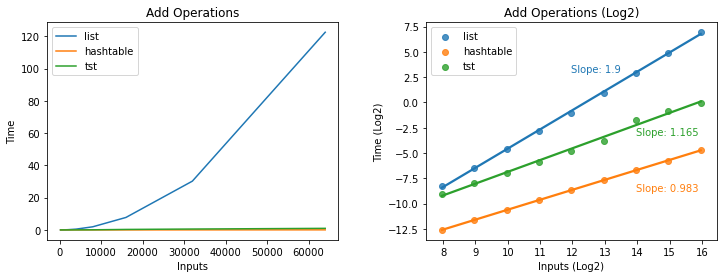

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,4))
grid = plt.GridSpec(1,2,wspace=0.3,hspace=0.3)

plt.subplot(grid[0,0])
sns.lineplot(x=input_sizes, y=runtime_list, label="list", ci=None)
sns.lineplot(x=input_sizes, y=runtime_hash, label="hashtable", ci=None)
sns.lineplot(x=input_sizes, y=runtime_tst, label="tst", ci=None)

plt.legend()
plt.title('Add Operations')
plt.ylabel('Time')
plt.xlabel('Inputs')

plt.subplot(grid[0,1])
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_list), label="list", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_hash), label="hashtable", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_tst), label="tst", ci=None)

plt.text(np.log2(input_sizes[-3]) - 2, np.log2(runtime_list[-3]), 'Slope: ' + str(round(list_slope,3)), c='#1f77b4')
plt.text(np.log2(input_sizes[-3]), np.log2(runtime_hash[-3]) - 2, 'Slope: ' + str(round(hash_slope,3)), c='#ff7f0e')
plt.text(np.log2(input_sizes[-3]), np.log2(runtime_tst[-3]) - 1.5, 'Slope: ' + str(round(tst_slope,3)), c='#2ca02c')
plt.legend()
plt.title('Add Operations (Log2)')
plt.ylabel('Time (Log2)')
plt.xlabel('Inputs (Log2)')
plt.xlim(np.log2(input_sizes)[0] - 0.5,np.log2(input_sizes)[-1] + 0.5)
plt.show()

#### Tables of Original and Transformed Data

In [253]:
import pandas as pd

columns = pd.MultiIndex.from_product([['Original Running Time T(N) in second'], ['List', 'Hashtable', 'TST']])
# pd.DataFrame({'Original Input Size(N)': input_sizes, columns: runtime_all})
df_scenario1_original = pd.DataFrame(np.concatenate((runtime_list[:,np.newaxis], runtime_hash[:,np.newaxis], runtime_tst[:,np.newaxis]), axis=1), index=input_sizes, columns=columns)
df_scenario1_original.index.name = 'Original Input Size (N)'
df_scenario1_original

Original Running Time T(N) in second            \
                                                        List Hashtable   
Original Input Size (N)                                                  
250                                                 0.003213  0.000162   
500                                                 0.011056  0.000308   
1000                                                0.041612  0.000627   
2000                                                0.141946  0.001265   
4000                                                0.489431  0.002489   
8000                                                1.933502  0.004934   
16000                                               7.729320  0.009422   
32000                                              30.240125  0.018556   
64000                                             122.549108  0.037947   

                                   
                              TST  
Original Input Size (N)            
250                      0.001925  
500                      0.003941  
1000                     0.007948  
2000                     0.016321  
4000                     0.035740  
8000                     0.072947  
16000                    0.300999  
32000                    0.547383  
64000                    0.972061

In [254]:
import pandas as pd

columns = pd.MultiIndex.from_product([['Logarithmic Running Time T(N) in second'], ['List', 'Hashtable', 'TST']])
# pd.DataFrame({'Original Input Size(N)': input_sizes, columns: runtime_all})
df_scenario1_original = pd.DataFrame(np.concatenate((np.log2(runtime_list)[:,np.newaxis], np.log2(runtime_hash)[:,np.newaxis], np.log2(runtime_tst)[:,np.newaxis]), axis=1), index=np.log2(input_sizes), columns=columns)
df_scenario1_original.index.name = 'Logarithmic Input Size (N)'
df_scenario1_original

Logarithmic Running Time T(N) in second             \
                                                              List  Hashtable   
Logarithmic Input Size (N)                                                      
7.965784                                                 -8.281863 -12.588753   
8.965784                                                 -6.498983 -11.664782   
9.965784                                                 -4.586857 -10.640014   
10.965784                                                -2.816589  -9.626647   
11.965784                                                -1.030824  -8.650411   
12.965784                                                 0.951216  -7.662929   
13.965784                                                 2.950341  -6.729700   
14.965784                                                 4.918392  -5.751996   
15.965784                                                 6.937216  -4.719858   

                                      
                                 TST  
Logarithmic Input Size (N)            
7.965784                   -9.020926  
8.965784                   -7.987345  
9.965784                   -6.975192  
10.965784                  -5.937127  
11.965784                  -4.806330  
12.965784                  -3.777008  
13.965784                  -1.732169  
14.965784                  -0.869378  
15.965784                  -0.040881

### Measure the Running Times of Scenario 2

In [255]:
# Each row contains the running times for all the implementations on one dataset in the order to list, hashtable, and tst.
running_times = np.empty((3,3,len(input_sizes)))

# Iterate over 3 datasets
for i in range(num_datasets):
    word_frequencies = []
    data_filename = 'generatedData/dataset' + str(i) + '.txt'
    # Create word_frequencies to build dictionaries
    with open(data_filename, 'r') as f: 
        for line in f:
            values = line.split()
            word = values[0]
            frequency = int(values[1])
            word_frequency = WordFrequency(word, frequency)  # each line contains a word and its frequency
            word_frequencies.append(word_frequency)
    agents = [ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()]
    for agent_idx, agent in enumerate(agents):
        agent.build_dictionary(word_frequencies)
        command_filename = "generatedData/shuffled_dataset" + str(i) + '.txt'
        counter = 0 
        running_time = 0
        with open(command_filename, 'r') as f:
            for line_idx, line in enumerate(f):
                values = line.split()
                word = values[0]
                start_time = time.time_ns()
                agent.delete_word(word)
                end_time = time.time_ns()
                running_time += (end_time - start_time) / math.pow(10, 9)
                if line_idx == input_sizes[counter] - 1:
                    running_times[agent_idx, i, counter] = running_time
                    counter += 1

In [256]:
runtime_list = np.sum(running_times[0], axis=0) / 3
runtime_hash = np.sum(running_times[1], axis=0) / 3
runtime_tst = np.sum(running_times[2], axis=0) / 3

#### Plot Logarithmic Test Results and a Linear Regression Line

In [257]:
from scipy import stats
list_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_list))
hash_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_hash))
tst_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_tst))

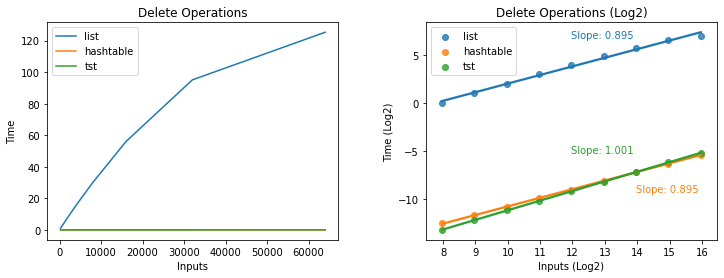

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,4))
grid = plt.GridSpec(1,2,wspace=0.3,hspace=0.3)

plt.subplot(grid[0,0])
# X_Y_Spline_list = make_interp_spline(input_sizes, runtime_list)
# X_list = np.linspace(min(input_sizes), max(input_sizes), 500)
# Y_list = X_Y_Spline_list(X_list)
# plt.plot(X_list, Y_list, label="list")
sns.lineplot(x=input_sizes, y=runtime_list, label="list", ci=None)
sns.lineplot(x=input_sizes, y=runtime_hash, label="hashtable", ci=None)
sns.lineplot(x=input_sizes, y=runtime_tst, label="tst", ci=None)

plt.legend()
plt.title('Delete Operations')
plt.ylabel('Time')
plt.xlabel('Inputs')

plt.subplot(grid[0,1])
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_list), label="list", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_hash), label="hashtable", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_tst), label="tst", ci=None)

plt.text(np.log2(input_sizes[-3]) - 2, np.log2(runtime_list[-3]) + 1, 'Slope: ' + str(round(list_slope,3)), c='#1f77b4')
plt.text(np.log2(input_sizes[-3]), np.log2(runtime_hash[-3]) - 2, 'Slope: ' + str(round(hash_slope,3)), c='#ff7f0e')
plt.text(np.log2(input_sizes[-3]) - 2, np.log2(runtime_tst[-3]) + 2, 'Slope: ' + str(round(tst_slope,3)), c='#2ca02c')
plt.legend()
plt.title('Delete Operations (Log2)')
plt.ylabel('Time (Log2)')
plt.xlabel('Inputs (Log2)')
plt.xlim(np.log2(input_sizes)[0] - 0.5, np.log2(input_sizes)[-1] + 0.5)
plt.show()

#### Tables of Original and Transformed Data

In [259]:
import pandas as pd

columns = pd.MultiIndex.from_product([['Original Running Time T(N) in second'], ['List', 'Hashtable', 'TST']])
# pd.DataFrame({'Original Input Size(N)': input_sizes, columns: runtime_all})
df_scenario2_original = pd.DataFrame(np.concatenate((runtime_list[:,np.newaxis], runtime_hash[:,np.newaxis], runtime_tst[:,np.newaxis]), axis=1), index=input_sizes, columns=columns)
df_scenario2_original.index.name = 'Original Input Size (N)'
df_scenario2_original

Original Running Time T(N) in second            \
                                                        List Hashtable   
Original Input Size (N)                                                  
250                                                 1.055711  0.000175   
500                                                 2.036377  0.000308   
1000                                                4.020136  0.000568   
2000                                                8.009820  0.001091   
4000                                               15.672190  0.001999   
8000                                               30.006836  0.003634   
16000                                              56.007358  0.006830   
32000                                              95.140578  0.012897   
64000                                             125.333216  0.024990   

                                   
                              TST  
Original Input Size (N)            
250                      0.000109  
500                      0.000215  
1000                     0.000445  
2000                     0.000901  
4000                     0.001764  
8000                     0.003496  
16000                    0.006996  
32000                    0.014080  
64000                    0.028041

In [260]:
import pandas as pd

columns = pd.MultiIndex.from_product([['Logarithmic Running Time T(N) in second'], ['List', 'Hashtable', 'TST']])
# pd.DataFrame({'Original Input Size(N)': input_sizes, columns: runtime_all})
df_scenario2_original = pd.DataFrame(np.concatenate((np.log2(runtime_list)[:,np.newaxis], np.log2(runtime_hash)[:,np.newaxis], np.log2(runtime_tst)[:,np.newaxis]), axis=1), index=np.log2(input_sizes), columns=columns)
df_scenario2_original.index.name = 'Logarithmic Input Size (N)'
df_scenario2_original

Logarithmic Running Time T(N) in second             \
                                                              List  Hashtable   
Logarithmic Input Size (N)                                                      
7.965784                                                  0.078215 -12.483108   
8.965784                                                  1.026005 -11.664782   
9.965784                                                  2.007244 -10.781821   
10.965784                                                 3.001770  -9.839692   
11.965784                                                 3.970135  -8.966506   
12.965784                                                 4.907219  -8.104094   
13.965784                                                 5.807544  -7.193899   
14.965784                                                 6.571989  -6.276858   
15.965784                                                 6.969625  -5.322525   

                                       
                                  TST  
Logarithmic Input Size (N)             
7.965784                   -13.167803  
8.965784                   -12.183376  
9.965784                   -11.133907  
10.965784                  -10.115652  
11.965784                   -9.146934  
12.965784                   -8.159942  
13.965784                   -7.159323  
14.965784                   -6.150243  
15.965784                   -5.156301

### Measure the Running Times of Scenario 3 

#### Search Operation (Successful Searches)

In [261]:
# Each row contains the running times for all the implementations on one dataset in the order to list, hashtable, and tst.
running_times = np.empty((3,3,3))
input_sizes = [250, 8000, 640000]

# Iterate over 3 datasets
for i in range(num_datasets):
    word_frequencies = []
    data_filename = 'generatedData/dataset' + str(i) + '.txt'
    # Create word_frequencies to build dictionaries
    with open(data_filename, 'r') as f: 
        for line in f:
            values = line.split()
            word = values[0]
            frequency = int(values[1])
            word_frequency = WordFrequency(word, frequency)  # each line contains a word and its frequency
            word_frequencies.append(word_frequency)
    # Sort word_frequencies by word in ascending order to get the indices for the list-based dictionary.
    word_frequencies_lst = sorted(word_frequencies,key=lambda x: x.word)
    agents = [ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()]
    for agent_idx, agent in enumerate(agents):
        agent.build_dictionary(word_frequencies)
        counter = 0 
        running_time = 0
        if agent_idx == 0: # list_based dictionary
            # Words at even indices of word_frequencies_lst get searched 
            for wf_idx, wf in enumerate(word_frequencies_lst):
                if wf_idx % 2 == 0:
                    start_time = time.time_ns()
                    agent.search(wf.word)
                    end_time = time.time_ns()
                    running_time += (end_time - start_time) / math.pow(10, 9)
                if wf_idx == input_sizes[counter] - 1:
                    running_times[agent_idx, i, counter] = running_time
                    counter += 1
        else:
            for wf_idx, wf in enumerate(word_frequencies):
                if wf_idx % 2 == 0:
                    start_time = time.time_ns()
                    agent.search(wf.word)
                    end_time = time.time_ns()
                    running_time += (end_time - start_time) / math.pow(10, 9)
                if wf_idx == input_sizes[counter] - 1:
                    running_times[agent_idx, i, counter] = running_time
                    counter += 1

In [262]:
runtime_list = np.sum(running_times[0], axis=0) / 3
runtime_hash = np.sum(running_times[1], axis=0) / 3
runtime_tst = np.sum(running_times[2], axis=0) / 3

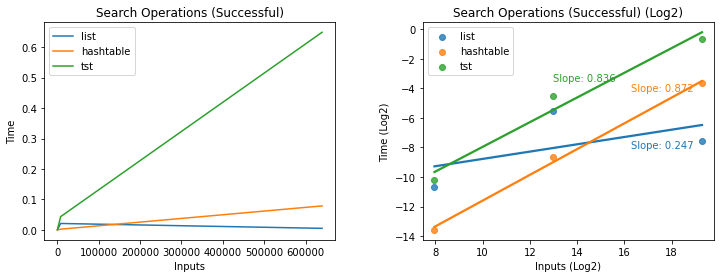

In [265]:
from scipy import stats
list_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_list))
hash_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_hash))
tst_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_tst))

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
grid = plt.GridSpec(1,2,wspace=0.3,hspace=0.3)



plt.subplot(grid[0,0])
sns.lineplot(x=input_sizes, y=runtime_list, label="list", ci=None)
sns.lineplot(x=input_sizes, y=runtime_hash, label="hashtable", ci=None)
sns.lineplot(x=input_sizes, y=runtime_tst, label="tst", ci=None)

plt.legend()
plt.title('Search Operations (Found)')
plt.ylabel('Time')
plt.xlabel('Inputs')

plt.subplot(grid[0,1])
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_list), label="list", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_hash), label="hashtable", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_tst), label="tst", ci=None)

plt.text(np.log2(input_sizes[-1]) - 3, np.log2(runtime_list[-1]) - 0.5, 'Slope: ' + str(round(list_slope,3)), c='#1f77b4')
plt.text(np.log2(input_sizes[-1]) - 3, np.log2(runtime_hash[-1]) - 0.5, 'Slope: ' + str(round(hash_slope,3)), c='#ff7f0e')
plt.text(np.log2(input_sizes[1]), np.log2(runtime_tst[1]) + 1, 'Slope: ' + str(round(tst_slope,3)), c='#2ca02c')
plt.legend()
plt.title('Search Operations (Found) (Log2)')
plt.ylabel('Time (Log2)')
plt.xlabel('Inputs (Log2)')
plt.xlim(np.log2(input_sizes)[0] - 0.5, np.log2(input_sizes)[-1] + 0.5)
plt.show()

In [ ]:
import pandas as pd

columns = pd.MultiIndex.from_product([['Original Running Time T(N) in second'], ['List', 'Hashtable', 'TST']])
# pd.DataFrame({'Original Input Size(N)': input_sizes, columns: runtime_all})
df_scenario3_original = pd.DataFrame(np.concatenate((runtime_list[:,np.newaxis], runtime_hash[:,np.newaxis], runtime_tst[:,np.newaxis]), axis=1), index=input_sizes, columns=columns)
df_scenario2_original.index.name = 'Original Input Size (N)'
df_scenario2_original

#### Search Operation (Unsuccessful Searches)

In [271]:
# Each row contains the running times for all the implementations on one dataset in the order to list, hashtable, and tst.
running_times = np.empty((3,3,3))
input_sizes = [250, 8000, 640000]

# Iterate over 3 datasets
for i in range(num_datasets):
    # First generate a dictionary by loading the ith dataset
    word_frequencies = []
    data_filename = 'generatedData/dataset' + str(i) + '.txt'
    # Create word_frequencies to build dictionaries
    with open(data_filename, 'r') as f: 
        for line in f:
            values = line.split()
            word = values[0]
            frequency = int(values[1])
            word_frequency = WordFrequency(word, frequency)  # each line contains a word and its frequency
            word_frequencies.append(word_frequency)
    # Read the ((i + 1) % 3)th dataset and look up its words at even indices in the dictionary generated from the ith dataset.
    search_word_frequencies = []
    search_filename = 'generatedData/dataset' + str((i + 1) % 3) + '.txt' 
    with open(search_filename, 'r') as f: 
        for line in f:
            values = line.split()
            word = values[0]
            frequency = int(values[1])
            word_frequency = WordFrequency(word, frequency)  # each line contains a word and its frequency
            search_word_frequencies.append(word_frequency)
    
    agents = [ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()]
    for agent_idx, agent in enumerate(agents):
        agent.build_dictionary(word_frequencies)
        counter = 0 
        running_time = 0
        for swf_idx, swf in enumerate(search_word_frequencies):
            if swf_idx % 2 == 0:
                start_time = time.time_ns()
                agent.search(swf.word)
                end_time = time.time_ns()
                running_time += (end_time - start_time) / math.pow(10, 9)
            if swf_idx == input_sizes[counter] - 1:
                running_times[agent_idx, i, counter] = running_time
                counter += 1

In [272]:
runtime_list = np.sum(running_times[0], axis=0) / 3
runtime_hash = np.sum(running_times[1], axis=0) / 3
runtime_tst = np.sum(running_times[2], axis=0) / 3

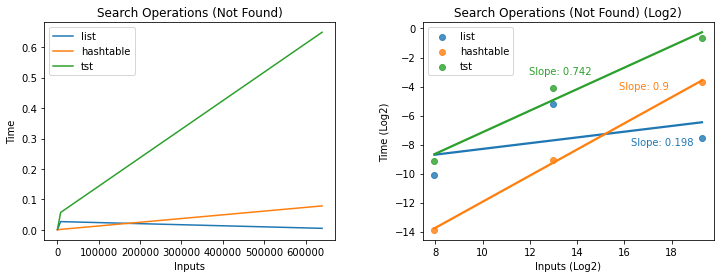

In [273]:
from scipy import stats
list_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_list))
hash_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_hash))
tst_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_tst))

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
grid = plt.GridSpec(1, 2, wspace=0.3, hspace=0.3)

plt.subplot(grid[0, 0])
sns.lineplot(x=input_sizes, y=runtime_list, label="list", ci=None)
sns.lineplot(x=input_sizes, y=runtime_hash, label="hashtable", ci=None)
sns.lineplot(x=input_sizes, y=runtime_tst, label="tst", ci=None)

plt.legend()
plt.ylabel('Time')
plt.xlabel('Inputs')
plt.title('Search Operations (Not Found)')

plt.subplot(grid[0, 1])
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_list), label="list", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_hash), label="hashtable", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_tst), label="tst", ci=None)

plt.text(np.log2(input_sizes[-1]) - 3, np.log2(runtime_list[-1]) - 0.5, 'Slope: ' + str(round(list_slope,3)), c='#1f77b4')
plt.text(np.log2(input_sizes[-1]) - 3.5, np.log2(runtime_hash[-1]) - 0.5, 'Slope: ' + str(round(hash_slope,3)), c='#ff7f0e')
plt.text(np.log2(input_sizes[1]) - 1, np.log2(runtime_tst[1]) + 1, 'Slope: ' + str(round(tst_slope,3)), c='#2ca02c')
plt.legend()
plt.ylabel('Time (Log2)')
plt.xlabel('Inputs (Log2)')
plt.xlim(np.log2(input_sizes)[0] - 0.5, np.log2(input_sizes)[-1] + 0.5)
plt.title('Search Operations (Not Found) (Log2)')

plt.show()

For the second part of Scenario 3, we will use the same 3 datasets split from "sampleData200k.txt" used in the first part. This time, however, we will find out the frequency of each of the existing prefixes in varying lengths. For example, we first extract from a dictionary the first letter from each word. We then calculate the frequency of words that start with the extracted first letters. Next, we extract the first two letters from the same dictionary. As in the precious step, we count the frequency of words that start with each of the extracted 2-letter-long prefixes. In this manner, we can find out the frequencies of prefixes up to 5 letter long; Once the prefix becomes longer than 5 letters, the standard variation of frequencies is too small for our testing purposes. In addition, most English prefixes are five or fewer letter long.

Once we have the data, we can perform auto-complete operations using the 3 most frequent prefixes of each of the lengths. For comparison, we also measure the running times of auto-complete operations using the 3 least frequent prefixes—a simulation of failed cases as the number of additional operations is minimal. After this, we try the same steps on two other dictionaries of bigger sizes, namely 4000, 64000.

After the first split dataset of size 64,000 is tested, we repeat the whole process on two other split datasets. It is then the average running times of auto-complete operations in the near-best (operations on the least frequent prefixes) and worst (operations on the most frequent prefixes) cases are calculated for the small, medium, large dictionaries. 

In [274]:
lst = []
num_datasets = 3
num_letters = 5
running_times_worst = np.empty((3,3,3))
running_times_best = np.empty((3,3,3))
input_sizes = [250, 8000, 640000]

for i in range(num_datasets):
    word_frequencies = []
    lst = []
    with open ('generatedData/dataset' + str(i) + '.txt') as f:
        # Fill word_frequencies with which to build dictionaries
        for line in f:
            values = line.split()
            word = values[0]
            frequency = int(values[1])
            word_frequency = WordFrequency(word, frequency)  # each line contains a word and its frequency
            word_frequencies.append(word_frequency)
            # Create a list of words found in the entire dataset
            lst.append(word)
        # Splice the list to three sizes: 250, 8000, 640000
        counter = 0
        for input_size in input_sizes:
            sub_word_frequencies = word_frequencies[:input_size]
            sub_lst = lst[:input_size]
            agents = [ListDictionary(), HashTableDictionary(), TernarySearchTreeDictionary()]

            # Build a dictionary for each size 
            for agent_idx, agent in enumerate(agents):
                agent.build_dictionary(sub_word_frequencies)
                running_time_worst = 0
                running_time_best = 0
                # Perform auto-complete operations for near-best and worst cases
                for n in range(num_letters):
                    prefixes = [el[:n + 1] for el in sub_lst]
                    unique, counts = np.unique(prefixes, return_counts=True)
                    indices = np.argsort(counts)
                    prefixes_best = unique[(indices)][:3]
                    prefixes_worst = unique[(indices)][-3:]
                    for prefix_best in prefixes_best:
                        start_time = time.time_ns()
                        agent.autocomplete(prefix_best)
#                         list_words = agent.autocomplete(prefix_best)
#                         res_line = "dataset:" + str(i) + " - input size: " + str(input_size) + " - agent: " + str(agent_idx) + " Autocomplete(best) for '" + prefix_best + "': [ "
#                         for item in list_words:
#                             res_line = res_line + item.word + ": " + str(item.frequency) + "  "
#                         print(res_line)
                        end_time = time.time_ns()
                        running_time_best += (end_time - start_time) / math.pow(10, 9)
                    for prefix_worst in prefixes_worst:
                        start_time = time.time_ns()
                        agent.autocomplete(prefix_worst)
#                         list_words = agent.autocomplete(prefix_worst)
#                         res_line = "dataset:" + str(i) + " - input size: " + str(input_size) + " - agent: " + str(agent_idx) + " Autocomplete for(worst) for '" + prefix_worst + "': [ "
#                         for item in list_words:
#                             res_line = res_line + item.word + ": " + str(item.frequency) + "  "
#                         print(res_line)
                        end_time = time.time_ns()
                        running_time_worst += (end_time - start_time) / math.pow(10, 9)
                running_times_worst[agent_idx, i, counter] = running_time_worst
                running_times_best[agent_idx, i, counter] = running_time_best
            counter += 1        

In [275]:
runtime_worst_list = np.sum(running_times_worst[0], axis=0) / 3
runtime_worst_hash = np.sum(running_times_worst[1], axis=0) / 3
runtime_worst_tst = np.sum(running_times_worst[2], axis=0) / 3
runtime_best_list = np.sum(running_times_best[0], axis=0) / 3
runtime_best_hash = np.sum(running_times_best[1], axis=0) / 3
runtime_best_tst = np.sum(running_times_best[2], axis=0) / 3

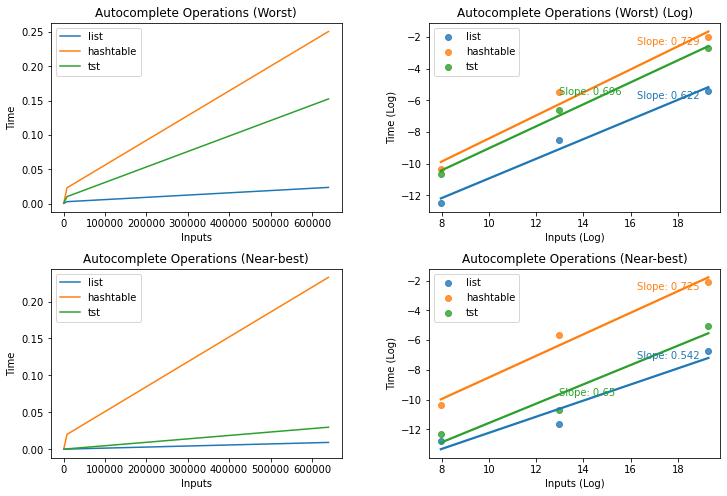

In [279]:
from scipy import stats
worst_list_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_worst_list))
worst_hash_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_worst_hash))
worst_tst_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_worst_tst))

best_list_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_best_list))
best_hash_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_best_hash))
best_tst_slope, intercept, r_value, p_value, std_err = stats.linregress(np.log2(input_sizes), np.log2(runtime_best_tst))

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
grid = plt.GridSpec(2, 2, wspace=0.3, hspace=0.3)

plt.subplot(grid[0, 0])
sns.lineplot(x=input_sizes, y=runtime_worst_list, label="list", ci=None)
sns.lineplot(x=input_sizes, y=runtime_worst_hash, label="hashtable", ci=None)
sns.lineplot(x=input_sizes, y=runtime_worst_tst, label="tst", ci=None)

plt.legend()
plt.ylabel('Time')
plt.xlabel('Inputs')
plt.title('Autocomplete Operations (Worst)')

plt.subplot(grid[0, 1])
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_worst_list), label="list", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_worst_hash), label="hashtable", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_worst_tst), label="tst", ci=None)

plt.text(np.log2(input_sizes[-1]) - 3, np.log2(runtime_worst_list[-1]) - 0.5, 'Slope: ' + str(round(worst_list_slope,3)), c='#1f77b4')
plt.text(np.log2(input_sizes[-1]) - 3, np.log2(runtime_worst_hash[-1]) - 0.5, 'Slope: ' + str(round(worst_hash_slope,3)), c='#ff7f0e')
plt.text(np.log2(input_sizes[1]), np.log2(runtime_worst_tst[1]) + 1, 'Slope: ' + str(round(worst_tst_slope,3)), c='#2ca02c')
plt.legend()
plt.ylabel('Time (Log)')
plt.xlabel('Inputs (Log)')
plt.xlim(np.log2(input_sizes)[0] - 0.5, np.log2(input_sizes)[-1] + 0.5)
plt.title('Autocomplete Operations (Worst) (Log)')

plt.subplot(grid[1, 0])
sns.lineplot(x=input_sizes, y=runtime_best_list, label="list", ci=None)
sns.lineplot(x=input_sizes, y=runtime_best_hash, label="hashtable", ci=None)
sns.lineplot(x=input_sizes, y=runtime_best_tst, label="tst", ci=None)

plt.legend()
plt.ylabel('Time')
plt.xlabel('Inputs')
plt.title('Autocomplete Operations (Near-best)')

plt.subplot(grid[1, 1])
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_best_list), label="list", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_best_hash), label="hashtable", ci=None)
sns.regplot(x=np.log2(input_sizes), y=np.log2(runtime_best_tst), label="tst", ci=None)

plt.text(np.log2(input_sizes[-1]) - 3, np.log2(runtime_best_list[-1]) - 0.5, 'Slope: ' + str(round(best_list_slope,3)), c='#1f77b4')
plt.text(np.log2(input_sizes[-1]) - 3, np.log2(runtime_best_hash[-1]) - 0.5, 'Slope: ' + str(round(best_hash_slope,3)), c='#ff7f0e')
plt.text(np.log2(input_sizes[1]), np.log2(runtime_best_tst[1]) + 1, 'Slope: ' + str(round(best_tst_slope,3)), c='#2ca02c')
plt.legend()
plt.ylabel('Time (Log)')
plt.xlabel('Inputs (Log)')
plt.title('Autocomplete Operations (Near-best)')
plt.xlim(np.log2(input_sizes)[0] - 0.5, np.log2(input_sizes)[-1] + 0.5)

plt.show()